## Import and explore data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
sns.set()

In [2]:
raw_data = pd.read_csv("car data.csv")


In [3]:
data = raw_data.copy()

In [4]:
(data.head())


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
(data.describe())

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.duplicated().sum()



2

In [7]:
data.drop_duplicates(inplace = True)


In [15]:
categorical_data = data.select_dtypes(include ='object')
categorical_data

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [17]:
numeric_data =  data.select_dtypes(exclude ='object')
numeric_data 

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


## Visualization

In [20]:
def CategoricalVisualizer(column_name, data):
    column_value_counts = data[column_name].value_counts().values.round(2)
    column_value_names = data[column_name].value_counts().index

    plt.figure(figsize=(7,5))
    colors = sns.color_palette('RdBu')

    # create a pie chart
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(column_value_counts, labels=column_value_names, autopct='%1.1f%%',colors=colors)
    plt.axis('equal')

    # create histogram 
    plt.subplot(1, 2, 2)
    plt.title(f'{column_name} Counts')
    sns.histplot(data[column_name])
    plt.tight_layout()

    plt.show()



  Fuel_Type  count
0    Petrol    239
1    Diesel     58
2       CNG      2 



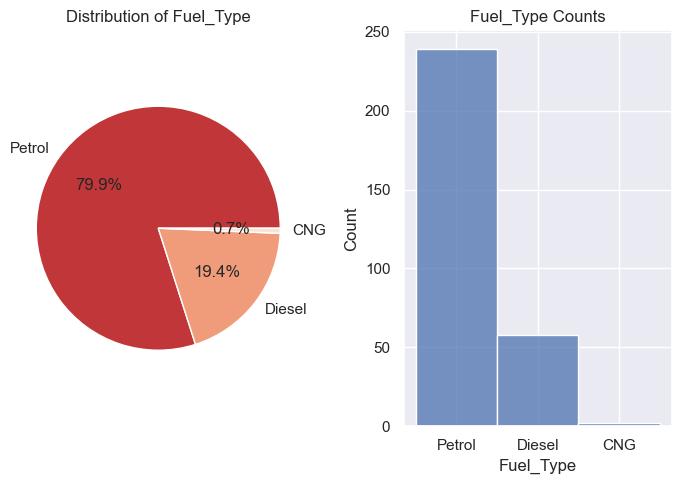

  Selling_type  count
0       Dealer    193
1   Individual    106 



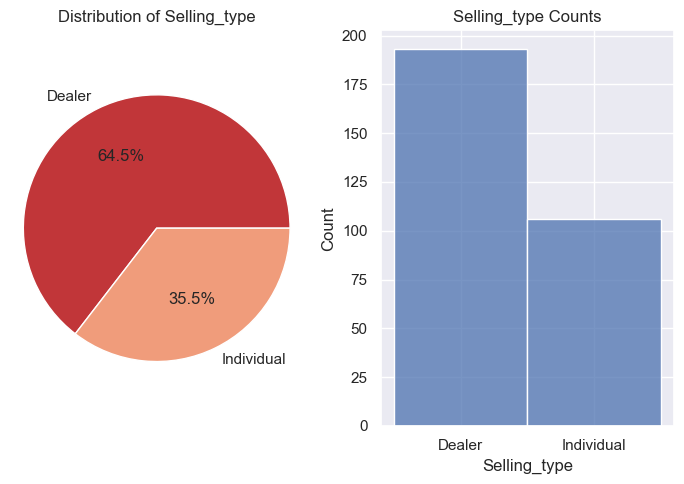

  Transmission  count
0       Manual    260
1    Automatic     39 



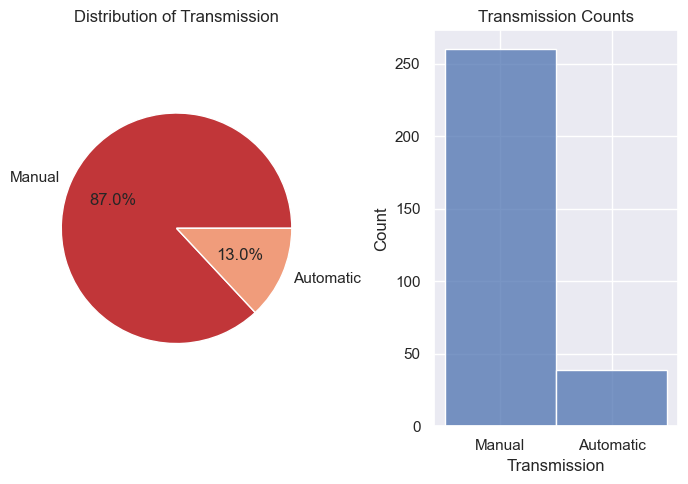

In [22]:
## visualize categorical_data

for column in categorical_data.columns :
    if column == "Car_Name":
        continue
    print(data[column].value_counts().reset_index(),'\n')

    CategoricalVisualizer(column , data)

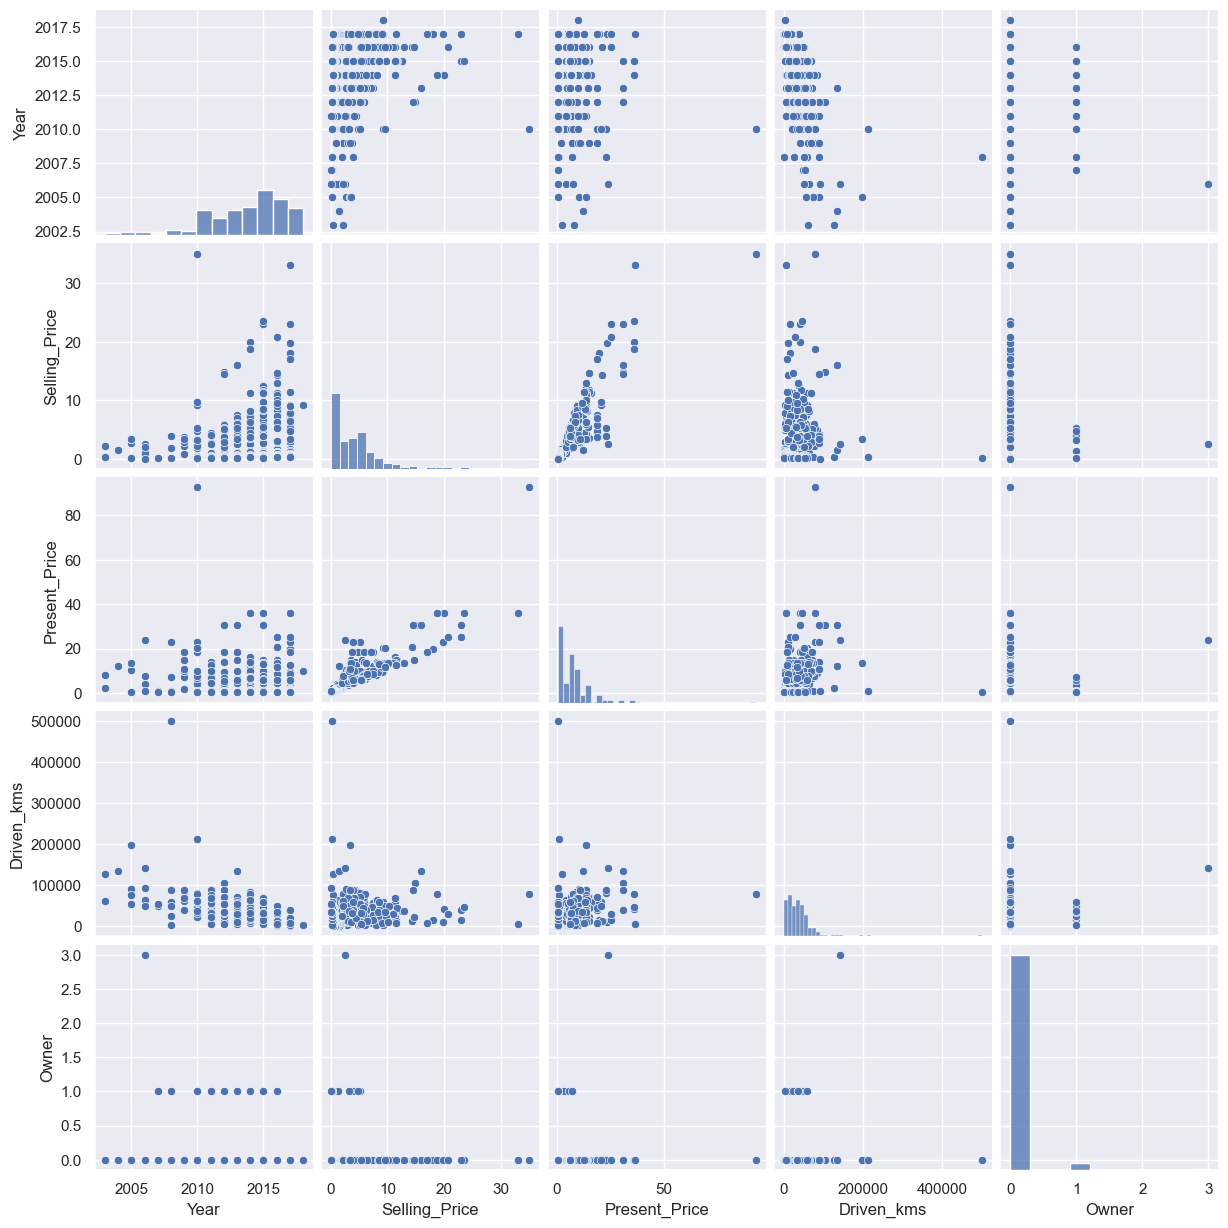

In [24]:
sns.pairplot(data)


## preprocessing

In [26]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [29]:
for c in data.columns:
    if c == "Fuel_Type" or c=="Selling_type" or c=="Owner" or c=="Car_Name":
        print ("-------", c , "Unique values", "-------")
        print("len: " , len(data[c].unique()))
        print (data[c].unique())

------- Car_Name Unique values -------
len:  98
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream

In [31]:
for column in categorical_data.columns :
    
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    print(label_encoder.classes_)

['800' 'Activa 3g' 'Activa 4g' 'Bajaj  ct 100' 'Bajaj Avenger 150'
 'Bajaj Avenger 150 street' 'Bajaj Avenger 220' 'Bajaj Avenger 220 dtsi'
 'Bajaj Avenger Street 220' 'Bajaj Discover 100' 'Bajaj Discover 125'
 'Bajaj Dominar 400' 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 135 LS'
 'Bajaj Pulsar 150' 'Bajaj Pulsar 220 F' 'Bajaj Pulsar NS 200'
 'Bajaj Pulsar RS200' 'Hero  CBZ Xtreme' 'Hero  Ignitor Disc'
 'Hero Extreme' 'Hero Glamour' 'Hero Honda CBZ extreme'
 'Hero Honda Passion Pro' 'Hero Hunk' 'Hero Passion Pro'
 'Hero Passion X pro' 'Hero Splender Plus' 'Hero Splender iSmart'
 'Hero Super Splendor' 'Honda Activa 125' 'Honda Activa 4G'
 'Honda CB Hornet 160R' 'Honda CB Shine' 'Honda CB Trigger'
 'Honda CB Unicorn' 'Honda CB twister' 'Honda CBR 150' 'Honda Dream Yuga '
 'Honda Karizma' 'Hyosung GT250R' 'KTM 390 Duke ' 'KTM RC200' 'KTM RC390'
 'Mahindra Mojo XT300' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 350' 'Royal Enfield Classic 500'
 'Royal Enfield Thunder 350' 'Royal Enfield 

In [33]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


## Modeling

In [36]:
def fit_train_test_model(model, X, y ):
    x_train,x_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=365)
    model.fit(x_train,y_train) 
    
    # test model
    y_predict = model.predict(x_test)

    #Evaluate Model
    print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
    print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
    print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
    print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
    
    # Scatter plot for real and predict data
    plt.scatter(y_test,y_predict)
    return model

In [38]:
X= data.drop(["Selling_Price"],axis=1)
y= data["Selling_Price"]

In [40]:
## scale X
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

R2 Score =  76.79%
Mean Absolute Error =  1.0533333333333335
Mean Squared Error =  8.502343333333334
Root Mean Squared Error =  2.915877798079565


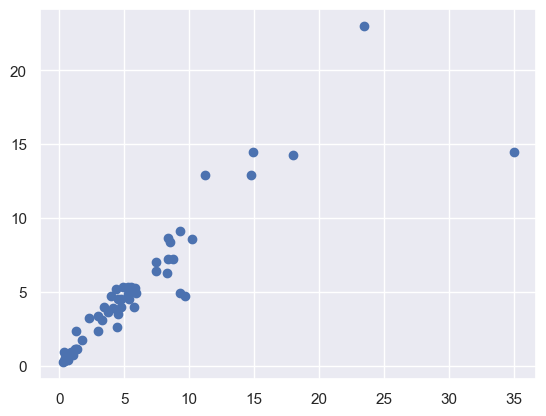

In [56]:
DR = fit_train_test_model(DecisionTreeRegressor(random_state=365), x_scaled, y)


In [58]:
importances = DR.feature_importances_
feature_names = X.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data


,Feature,Importance
2,Present_Price,0.843750
1,Year,0.088226
3,Driven_kms,0.040741
5,Selling_type,0.016913
0,Car_Name,0.007248
4,Fuel_Type,0.002548
6,Transmission,0.000557
7,Owner,0.000017


R2 Score =  93.51%
Mean Absolute Error =  0.7415003872315088
Mean Squared Error =  2.3790813867251246
Root Mean Squared Error =  1.542427109047661


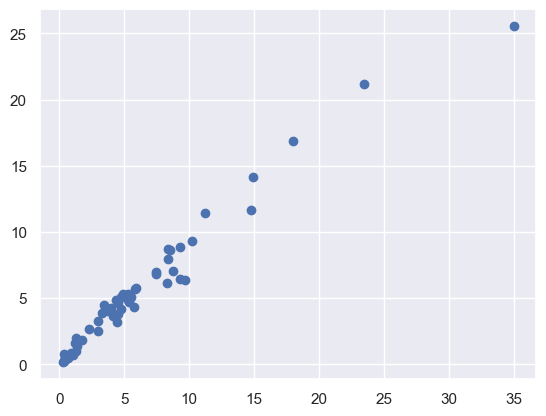

In [60]:
XGBR = DR = fit_train_test_model(XGBRegressor(), x_scaled, y)


In [62]:
importances = XGBR.feature_importances_
feature_names = X.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data


,Feature,Importance
2,Present_Price,0.790040
1,Year,0.145914
0,Car_Name,0.039187
4,Fuel_Type,0.013283
3,Driven_kms,0.004573
5,Selling_type,0.003480
6,Transmission,0.003084
7,Owner,0.000439


R2 Score =  82.52%
Mean Absolute Error =  1.4444862285822322
Mean Squared Error =  6.403956522588268
Root Mean Squared Error =  2.5306039837533385


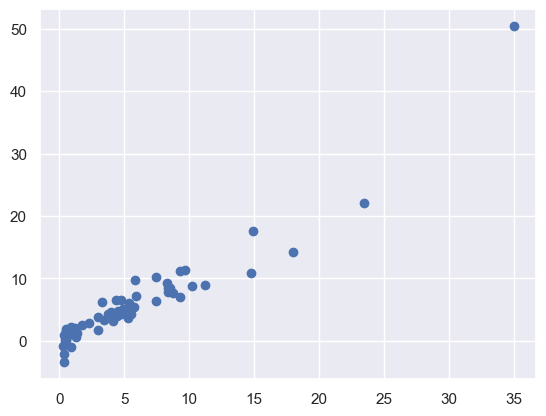

In [64]:
LR = fit_train_test_model(LinearRegression(), x_scaled, y)


In [66]:
# the coefficients
# LR.coef_
# The coefficients in a dataframe
cdf = pd.DataFrame(LR.coef_,X.columns,columns=['Coef'])
cdf.reset_index()

,index,Coef
0,Car_Name,-0.436988
1,Year,5.896453
2,Present_Price,50.365037
3,Driven_kms,-3.496312
4,Fuel_Type,-2.512621
5,Selling_type,-0.589808
6,Transmission,-0.356890
7,Owner,-2.843513


R2 Score =  89.51%
Mean Absolute Error =  0.8254566666666665
Mean Squared Error =  3.8416063533333307
Root Mean Squared Error =  1.9600016207476285


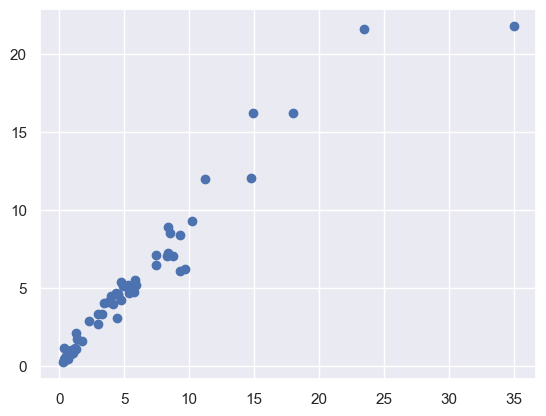

In [68]:
RR = fit_train_test_model(RandomForestRegressor(), x_scaled, y)


In [70]:
importances = RR.feature_importances_
feature_names = X.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data


,Feature,Importance
2,Present_Price,0.852780
1,Year,0.085714
3,Driven_kms,0.023981
0,Car_Name,0.023322
5,Selling_type,0.011036
4,Fuel_Type,0.001250
7,Owner,0.001176
6,Transmission,0.000742
